[A Comprehensive Guide To Visualizing and Analyzing DICOM Images in Python](https://medium.com/@hengloose/a-comprehensive-starter-guide-to-visualizing-and-analyzing-dicom-images-in-python-7a8430fcb7ed)

In [1]:
import workflow.dicom_workflow as workflow
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [2]:
os.environ["dicom_path"] = "C:/ntpu_project/LIDC-IDRI/"

In [55]:
workflow.get_directory()

reading total...2/2 patient folders


In [56]:
workflow.dicom_directory

['C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/']

In [29]:
os.environ["dicom_path"] = "C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-0003/"

In [30]:
workflow.run()

reading total...2/2 patient folders
Worker 1: C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-0003/01-01-2000-94866/3000611-03264/
C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-0003/01-01-2000-94866/3000611-03264/072.xml
reading total...50/140 patient DICOMs
reading total...100/140 patient DICOMs
reading total...140/140 patient DICOMs
has_only_one_result
1.3.6.1.4.1.14519.5.2.1.6279.6001.314855836163512457174075547165 distance >= 30, (309, 195) & (219, 217)
has_only_one_result
1.3.6.1.4.1.14519.5.2.1.6279.6001.141096165966608967945615635855 distance >= 30, (368, 334) & (370, 365)
1.3.6.1.4.1.14519.5.2.1.6279.6001.236509453780802407329743966134 nodule_type NODULE_GREATER_THAN_3MM
1.3.6.1.4.1.14519.5.2.1.6279.6001.186842181911642729363994773000 nodule_type NODULE_GREATER_THAN_3MM
1.3.6.1.4.1.14519.5.2.1.6279.6001.317438233214254436307118708428 nodule_type NODULE_GREATER_THAN_3MM
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.149772051318491213433932219079 nodule_type not same, NON_NODULE_GREATER_THA

In [31]:
len(workflow.mapped_ct_dicom_list)

35

In [35]:
same_count = 0
for i, dicom in enumerate(workflow.mapped_ct_dicom_list):
    same_count += dicom.is_same_examination_result
    if dicom.is_same_examination_result:
        print(i)
print(f'same_count = {same_count}')

7
9
11
22
27
same_count = 5


In [37]:
dicom = workflow.mapped_ct_dicom_list[7]
image = dicom.pixel_array
nodule_list = dicom.nodule_list
print(f'is same result = {dicom.is_same_examination_result}')

is same result = True


In [38]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import randn
import time

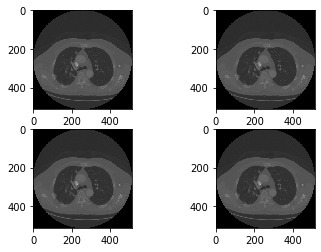

In [39]:
size = len(dicom.nodule_list)
fig, axes = plt.subplots(2,2)
for i, nodule in enumerate(dicom.nodule_list):
    # print(f'{0 if (i/2)<1 else 1}, {(i%2)}')
    current_axe = axes[(0 if (i/2)<1 else 1), (i%2)]
    current_axe.imshow(dicom.pixel_array, cmap=plt.cm.gray)
    for j, edge_map in enumerate(nodule.edge_map_list):
        pass

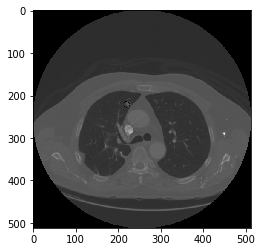

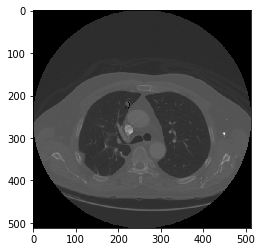

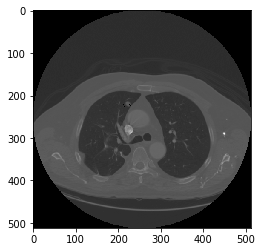

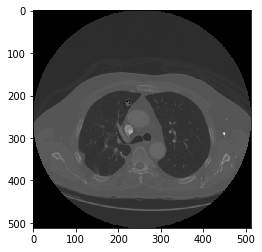

In [46]:
size = len(dicom.nodule_list)
for i, nodule in enumerate(dicom.nodule_list):
    # print(f'{0 if (i/2)<1 else 1}, {(i%2)}')
    current_axe = axes[(0 if (i/2)<1 else 1), (i%2)]
    temp_pixel_array = copy.deepcopy(dicom.pixel_array)
    for edge in nodule.edge_map_list:
        temp_pixel_array[int(edge.x), int(edge.y)] = -1024
    plt.imshow(temp_pixel_array, cmap=plt.cm.gray)
    plt.show()

In [43]:
# current_axe.plot(
#     [edge.x for edge in nodule.edge_map_list],
#     [edge.y for edge in nodule.edge_map_list],
#     'ko--'
# )
# dicom.nodule_list[0].edge_map_list
# <Edge(x = 212, y = 154)> <Edge(x = 212, y = 155)>
# print(dicom.pixel_array.shape) # (512, 512)
# print(dicom.pixel_array)
for i, nodule in enumerate(dicom.nodule_list):
    print(f'== {i+1} ==')
    for edge in nodule.edge_map_list:
        print(f'{edge.x}, {edge.x}')
        pass

== 1 ==
219, 219
218, 218
217, 217
216, 216
215, 215
214, 214
214, 214
214, 214
215, 215
215, 215
216, 216
216, 216
217, 217
218, 218
219, 219
220, 220
221, 221
222, 222
223, 223
224, 224
225, 225
226, 226
227, 227
228, 228
229, 229
229, 229
229, 229
228, 228
228, 228
227, 227
227, 227
227, 227
226, 226
225, 225
224, 224
223, 223
222, 222
221, 221
220, 220
219, 219
== 2 ==
225, 225
226, 226
227, 227
228, 228
228, 228
228, 228
229, 229
229, 229
229, 229
229, 229
229, 229
229, 229
228, 228
227, 227
226, 226
225, 225
225, 225
224, 224
223, 223
222, 222
221, 221
220, 220
219, 219
218, 218
217, 217
216, 216
215, 215
215, 215
215, 215
215, 215
216, 216
216, 216
217, 217
217, 217
218, 218
219, 219
220, 220
221, 221
222, 222
223, 223
224, 224
225, 225
== 3 ==
225, 225
226, 226
227, 227
228, 228
229, 229
229, 229
230, 230
230, 230
230, 230
230, 230
229, 229
229, 229
228, 228
227, 227
226, 226
225, 225
224, 224
223, 223
222, 222
221, 221
220, 220
219, 219
218, 218
217, 217
216, 216
215, 215
215,

In [24]:
print(dicom.pixel_array[212, 154])
print(dicom.pixel_array[255, 255])

-1024
617


In [54]:
print(dicom.full_path)

C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/000026.dcm


In [9]:
dicom.pixel_array.shape

(512, 512)

In [11]:
from scipy.ndimage import filters

In [18]:
sobel_mask_x = np.array([
    [-1, -4, -6, -4, -1],
    [-2, -8, -12, -8, -2],
    [0, 0, 0, 0, 0],
    [2, 8, 12, 8, 2],
    [1, 4, 6, 4, 1],
])

In [25]:
# https://stackoverflow.com/questions/35565312/is-there-a-convolution-function-in-tensorflow-to-apply-a-sobel-filter
import tensorflow as tf

In [28]:
sobel_x = tf.constant([
    [-1, -4, -6, -4, -1],
    [-2, -8, -12, -8, -2],
    [0, 0, 0, 0, 0],
    [2, 8, 12, 8, 2],
    [1, 4, 6, 4, 1],
], tf.float32)
sobel_x_filter = tf.reshape(sobel_x, [5, 5, 1, 1])

In [39]:
# Shape = height x width.
image = tf.placeholder(tf.float32, shape=dicom.pixel_array.shape)

# Shape = 1 x height x width x 1.
image_resized = tf.expand_dims(tf.expand_dims(dicom.pixel_array, 0), 5)

filtered_x = tf.nn.conv2d(image_resized, sobel_x_filter,
                          strides=[1, 1, 1, 1], padding='SAME')

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [7]:
import cv2

[[ -1  -4  -6  -4  -1]
 [ -2  -8 -12  -8  -2]
 [  0   0   0   0   0]
 [  2   8  12   8   2]
 [  1   4   6   4   1]]
[[  1   2   0  -2  -1]
 [  4   8   0  -8  -4]
 [  6  12   0 -12  -6]
 [  4   8   0  -8  -4]
 [  1   2   0  -2  -1]]


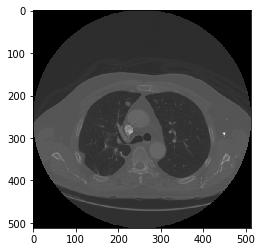

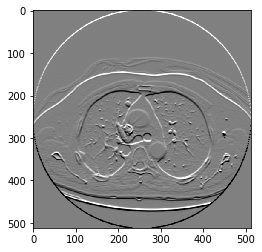

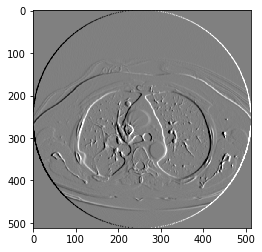

In [47]:
### kernel_size = 5
 
# 使用numpy建立 5*5且值為1/(5**2)的矩陣作為kernel。
 
kernel_x = np.array([
    [-1, -4, -6, -4, -1],
    [-2, -8, -12, -8, -2],
    [0, 0, 0, 0, 0],
    [2, 8, 12, 8, 2],
    [1, 4, 6, 4, 1],
])

kernel_y = np.array([
    [1, 2, 0, -2, -1],
    [4, 8, 0, -8, -4],
    [6, 12, 0, -12, -6],
    [4, 8, 0, -8, -4],
    [1, 2, 0, -2, -1],
    
])
 

print (kernel_x)
print (kernel_y)
 
# 使用cv2.filter2D進行convolute，
 
result_x = cv2.filter2D(image, ddepth=-1 , dst=-1, kernel=kernel_x, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
result_y = cv2.filter2D(image, ddepth=-1 , dst=-1, kernel=kernel_y, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
 
# cv2.imshow("Filter", result)
# cv2.imshow("Original", image)
 

plt.imshow(image, cmap=plt.cm.gray)
plt.show()
plt.imshow(result_x, cmap=plt.cm.gray)
plt.show()
plt.imshow(result_y, cmap="gray")
plt.show()